In [1]:
#Import modules

import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp

print("Import successfull")

Import successfull


In [2]:
#Connection to database
conn = psycopg2.connect(database="goat", user="goat", password="earlmanigault", host="localhost", port="65432")
cur = conn.cursor()
print("Opened database successfully")

Opened database successfully


In [3]:
#Load data and pre processing
data = pd.read_sql_query("SELECT a.nursery_comp, a.kindergarten_comp, p.*, g.* from grid_access_comp a, grid_population p, grid_access_20 g where a.grid_id = p.grid_id and p.grid_id = g.grid_id;", conn, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize=None)
print("Tables selected successfully")

Tables selected successfully


In [4]:
#Define categories and amenities in grid_access table
amenities_education = ['Nursery_Comp', 'Kindergarten_Comp', 'Nursery', 'Kindergarten']


In [5]:
#Define Lorenz-Curve Function
def lorenz(data, amenities, column2):
    a = plt.figure(num=1,dpi=500)
    axes = a.add_axes([0.1,0.1,0.8,0.8])
    axes.set_xlim([0,1])
    axes.set_ylim([0,1])
    axes.set_xlabel('Share of Population')
    axes.set_ylabel('Share of Accessibility')
    axes.grid(True, color ='#EEEEEE')
    perfect_line = plt.plot ([0,1],[0,1], label = 'Line of absolute equality', color = 'black')
    for category in amenities:
        df1 = data[data[category.lower()]>0]
        df1 = df1[df1[category.lower()]<10]
        df2 = df1[df1[column2]>0]
        order_ai = df2.sort_values(by=[category.lower()], ascending=True)
        order_pop = df2.sort_values(by=[column2], ascending=True)
        sum_ai = np.sum(order_ai[category.lower()])
        sum_pop = np.sum(order_ai[column2])
        cumsum_ai = np.cumsum(order_ai[category.lower()])
        cumsum_pop = np.cumsum(order_ai[column2])
        x = cumsum_pop/sum_pop
        y = cumsum_ai/sum_ai
        lorenz = plt.plot(x,y, label = category.replace("_", " "))
    plt.legend(loc='upper left')
    plt.show()

In [6]:
#Define Gini-Coefficient function
def gini (data, amenities, column2):
    for category in amenities:
        df1 = data[data[category.lower()]>0]
        df2 = df1[df1[column2]>0]
        order_ai = df2.sort_values(by=[category.lower()], ascending=True)
        sum_ai = np.sum(order_ai[category.lower()])
        sum_pop = np.sum(order_ai[column2])
        cumsum_ai = list(np.cumsum(order_ai[category.lower()]))
        cumsum_pop = list(np.cumsum(order_ai[column2]))
        x = list(cumsum_pop/sum_pop)
        y = list(cumsum_ai/sum_ai)
        for i in range(len(cumsum_ai)):
            if i < 1:
                ca = 0
            if i >= 1:
                ca = ca + 0.5 * (y[i-1]+y[i]) * (x[i]-x[i-1])
        ca = 0.5 - ca
        gini = ca*((2*np.count_nonzero(df2))/(np.count_nonzero(df2)-1))
        print(category.replace("_", " "), round(gini,2))

Nursery Comp 0.2
Kindergarten Comp 0.07
Nursery 0.17
Kindergarten 0.11


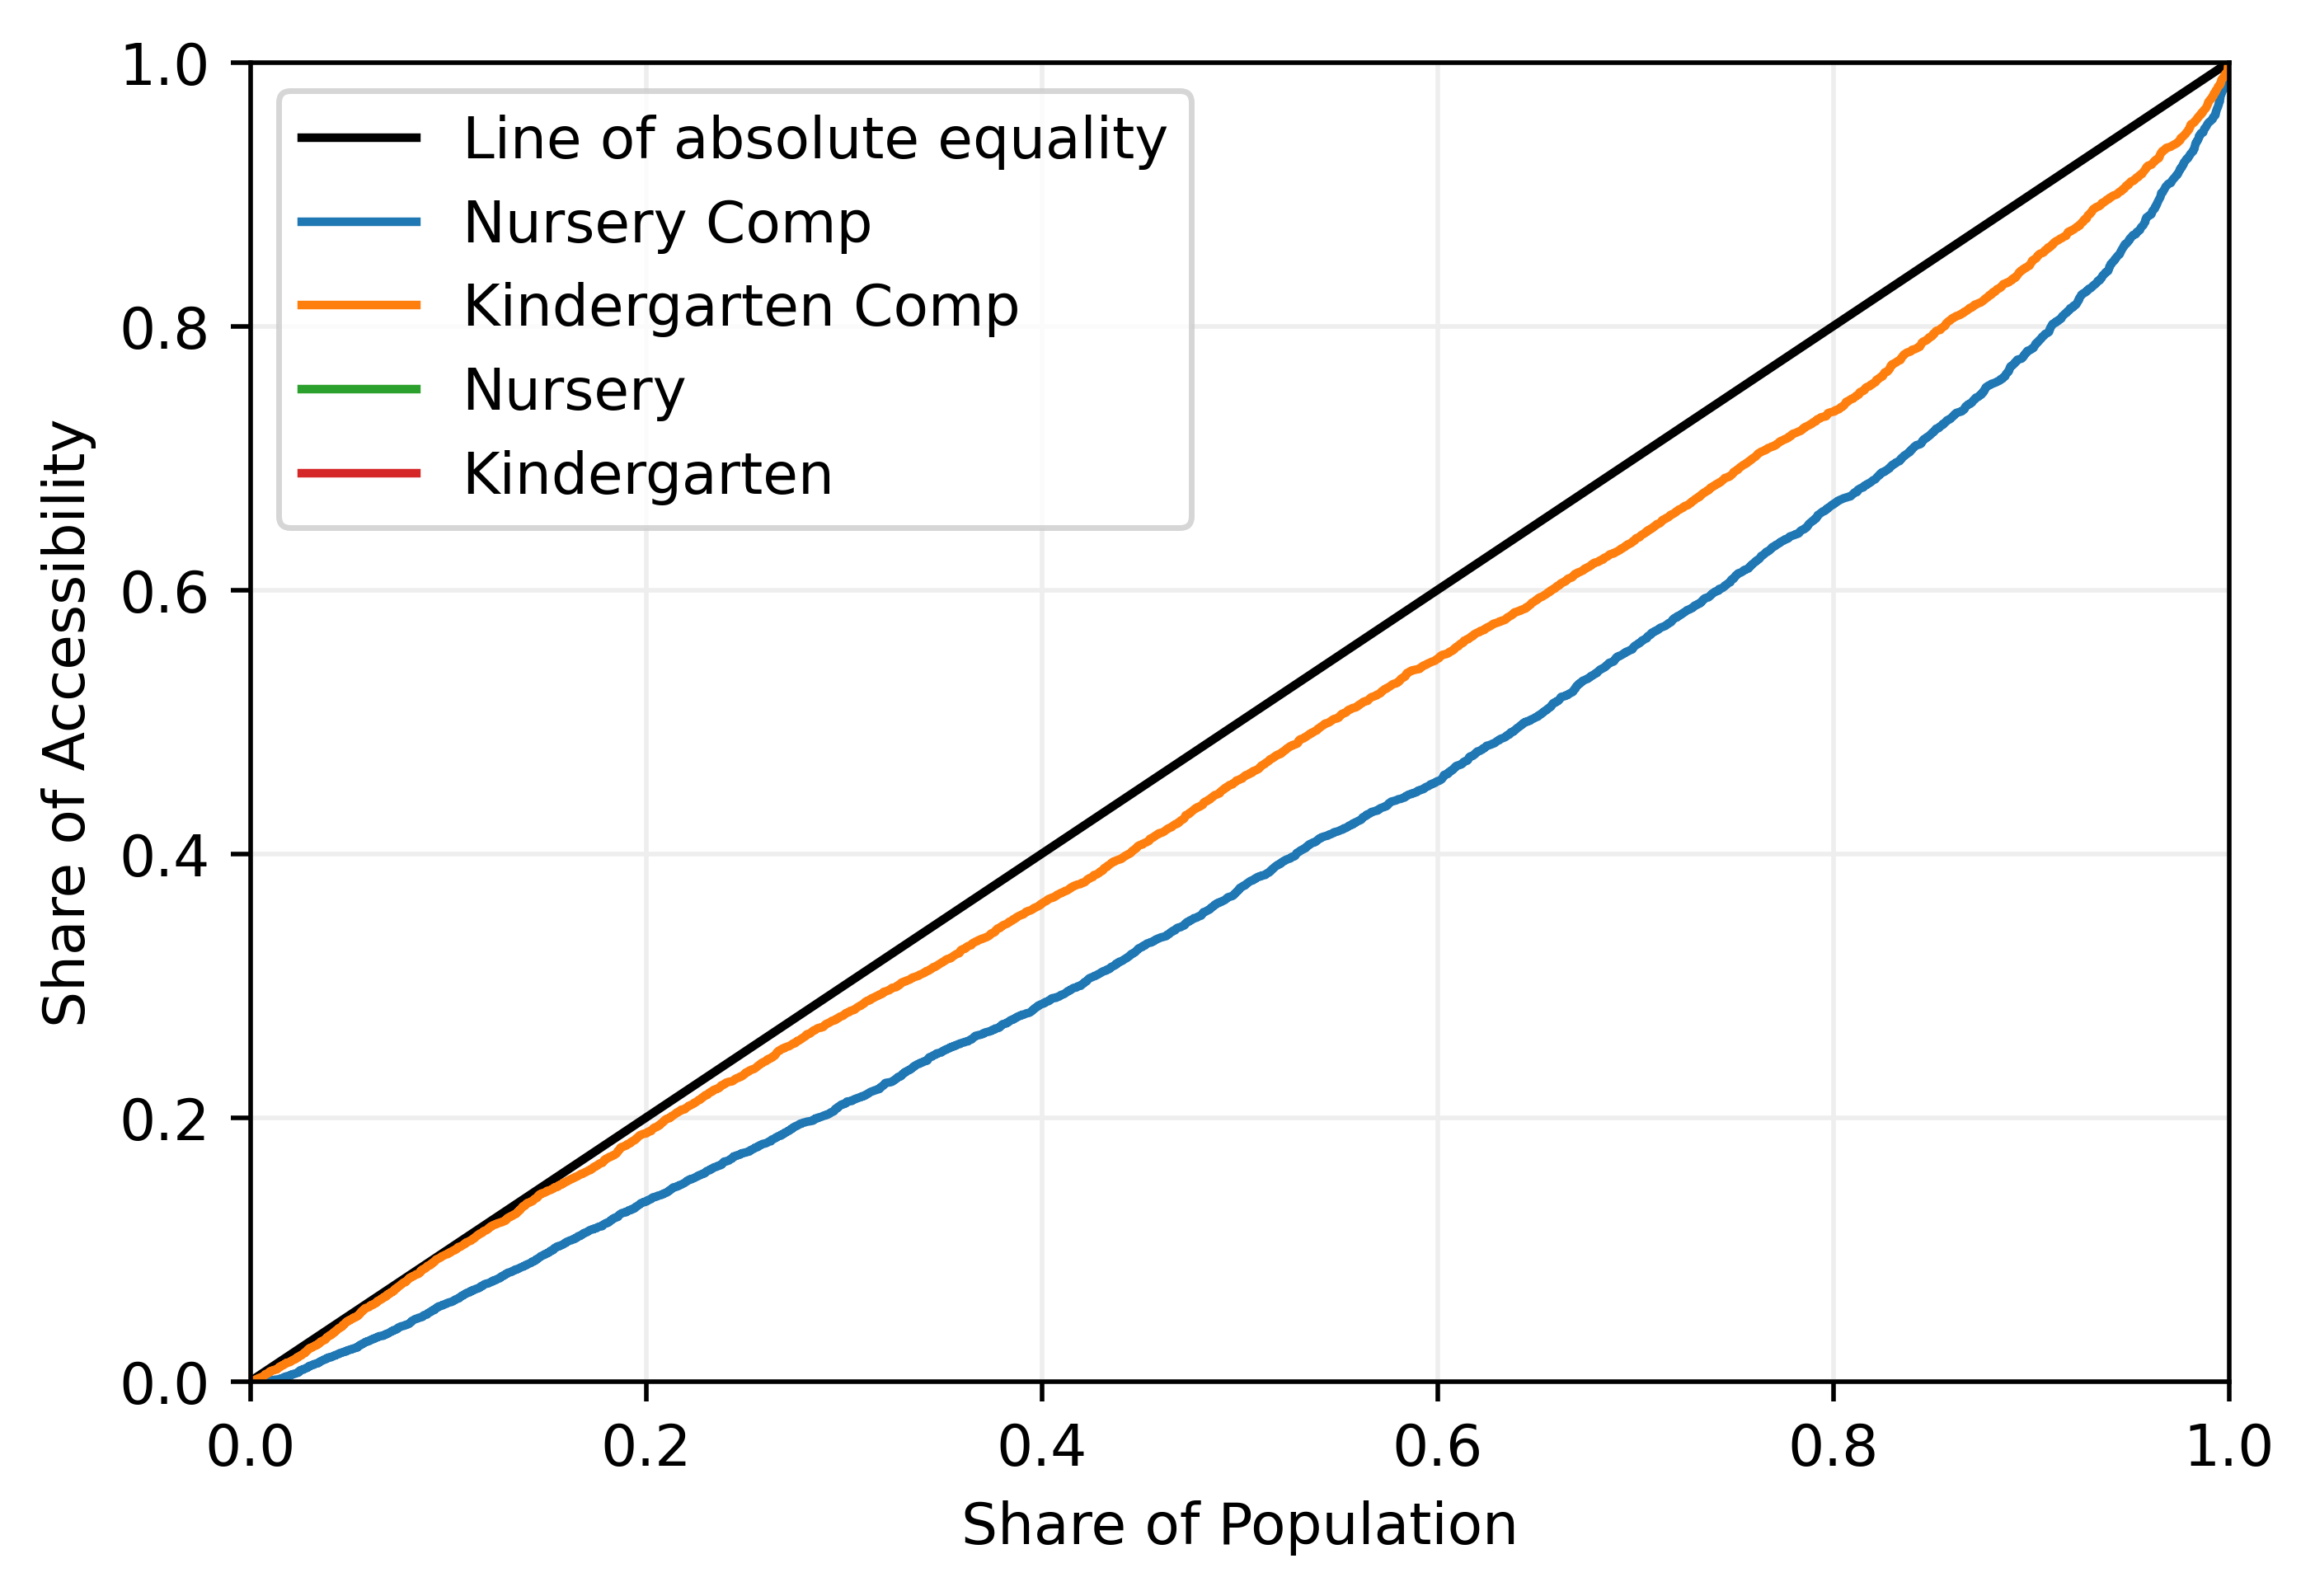

In [7]:
df = data[data['kindergarten_comp']<10]
gini(df,amenities_education,'population')
lorenz(df,amenities_education,'population')